In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as stdev
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

## 1. Entorno

In [141]:
data=np.load("proyecto_training_data.npy")

In [142]:
dataset=pd.DataFrame(data,columns=['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd','YearBuilt', 'LotFrontage'])
dataset.head()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0


## 2. Slicing 80% training; 20% testing

### Training

In [143]:
datasetTraining=dataset.sample(n=1168)
datasetTraining.head()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
268,120500.0,5.0,778.0,4.0,1940.0,71.0
1372,274300.0,7.0,1108.0,8.0,1998.0,75.0
1174,239000.0,6.0,1170.0,9.0,1932.0,80.0
331,139000.0,5.0,1056.0,6.0,1958.0,70.0
949,197500.0,6.0,1381.0,5.0,1972.0,78.0


### Testing

In [144]:
dft=dataset.merge(datasetTraining.drop_duplicates(), on=['SalePrice', 'OverallQual','1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage'], how='left', indicator=True)
dft=dft[dft._merge=='left_only']
datasetTesting=dft.drop(['_merge'], axis=1)
datasetTesting.head()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
8,129900.0,7.0,1022.0,8.0,1931.0,51.0
12,144000.0,5.0,912.0,4.0,1962.0,NaN
16,149000.0,6.0,1004.0,5.0,1970.0,NaN
23,129900.0,5.0,1060.0,6.0,1976.0,44.0


## 3. Analisis exploratorio

In [145]:
def exploratoryAnalysis(df):
    for col in df.columns:
        media=df[col].mean()
        maxValue=df[col].max()
        minValue=df[col].min()
        rango=maxValue-minValue
        std=stdev.stdev(df[col])
        print(col + ' - Media: ' + str(media) + ' - Valor maximo: ' + str(maxValue) + ' - Valor minimo: ' + str(minValue) + ' - Rango: ' + str(rango) + '- Desviación estandard: ' + str(std))

In [146]:
exploratoryAnalysis(datasetTraining)

SalePrice - Media: 181164.96061643836 - Valor maximo: 755000.0 - Valor minimo: 34900.0 - Rango: 720100.0- Desviación estandard: 80064.3737740589
OverallQual - Media: 6.11986301369863 - Valor maximo: 10.0 - Valor minimo: 1.0 - Rango: 9.0- Desviación estandard: 1.3796225338745585
1stFlrSF - Media: 1167.1729452054794 - Valor maximo: 4692.0 - Valor minimo: 334.0 - Rango: 4358.0- Desviación estandard: 382.5647416408883
TotRmsAbvGrd - Media: 6.5479452054794525 - Valor maximo: 12.0 - Valor minimo: 2.0 - Rango: 10.0- Desviación estandard: 1.6275570004229236
YearBuilt - Media: 1971.1190068493152 - Valor maximo: 2009.0 - Valor minimo: 1872.0 - Rango: 137.0- Desviación estandard: 30.42608668040893
LotFrontage - Media: 70.37282941777323 - Valor maximo: 313.0 - Valor minimo: 21.0 - Rango: 292.0- Desviación estandard: nan


## 4. Histograma

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

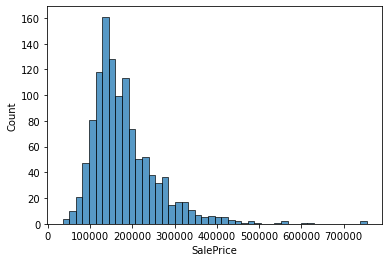

In [147]:
sns.histplot(data=datasetTraining, x='SalePrice')

<AxesSubplot:xlabel='OverallQual', ylabel='Count'>

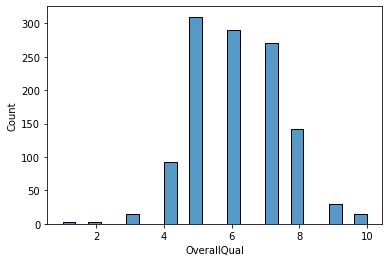

In [148]:
sns.histplot(data=datasetTraining, x='OverallQual')

<AxesSubplot:xlabel='1stFlrSF', ylabel='Count'>

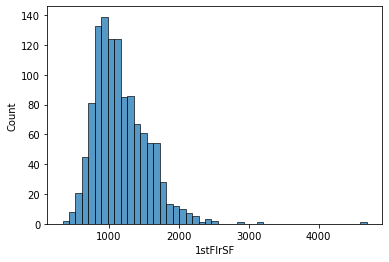

In [149]:
sns.histplot(data=datasetTraining, x='1stFlrSF')

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='Count'>

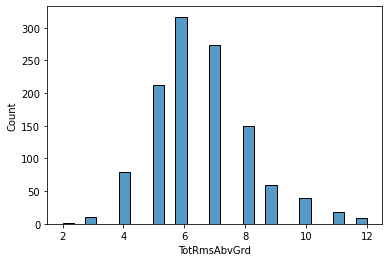

In [150]:
sns.histplot(data=datasetTraining, x='TotRmsAbvGrd')

<AxesSubplot:xlabel='YearBuilt', ylabel='Count'>

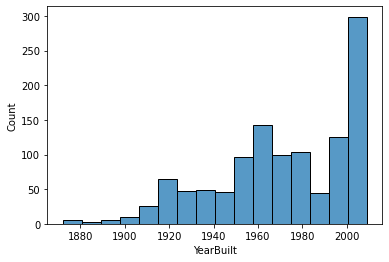

In [151]:
sns.histplot(data=datasetTraining, x='YearBuilt')

<AxesSubplot:xlabel='LotFrontage', ylabel='Count'>

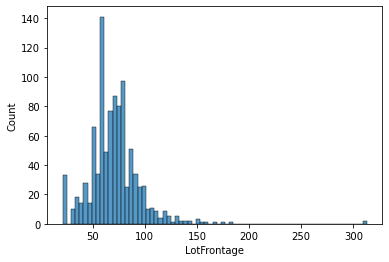

In [152]:
sns.histplot(data=datasetTraining, x='LotFrontage')

## 5. Para cada variable independiente x

### Coeficiente de correlación

In [153]:
def calcCorrCoef(df, target):
    for col in df.columns:
        print('Correlación - ' + col + ':', df[target].corr(df[col], method='pearson'))

In [154]:
calcCorrCoef(datasetTraining, 'SalePrice')

Correlación - SalePrice: 1.0
Correlación - OverallQual: 0.7844120820739611
Correlación - 1stFlrSF: 0.5828843444979408
Correlación - TotRmsAbvGrd: 0.5327780134541965
Correlación - YearBuilt: 0.5086838456903178
Correlación - LotFrontage: 0.3209856557339117


### Graficar x vs y (scatterplot)

In [155]:
def scatterplot(df, target):
    for col in df.columns:
        cofcor=df[target].corr(df[col], method='pearson')
        sns.scatterplot(data=df, x=df[col], y=df[target]).set(title=cofcor)
        plt.show()

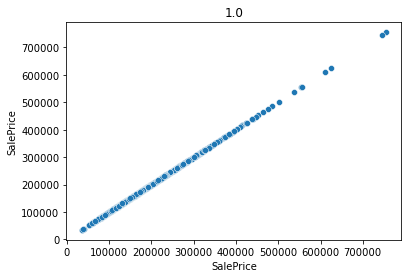

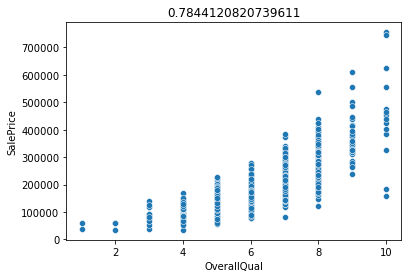

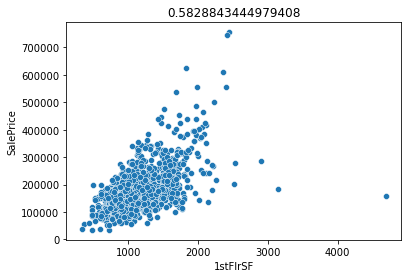

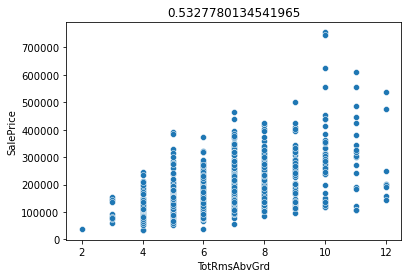

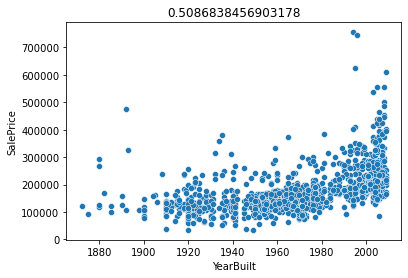

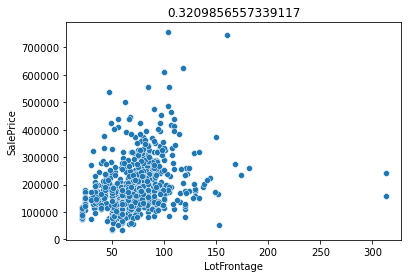

In [156]:
scatterplot(datasetTraining, 'SalePrice')

#### Las dos variables que presentan mayor correlación son: OverallQual y 1stFlrSF

## 6. Función para entrenar un modelo de regresión lineal

In [157]:
x=datasetTraining['1stFlrSF']
y=datasetTraining['SalePrice']
epochs=200
imprimir_error_cada=1
learning_rate=0.00000001


## 7. Creando la función

In [158]:
unos=np.ones(np.shape(x)).reshape(-1,1)
x=x.to_numpy().reshape(-1,1)
a=np.hstack([x,unos])
b0=0
b1=0
errores=[]
iteracionErrores=[]
diccionario={}
for i in range(epochs):
    betas=np.array([b1,b0]).reshape(-1,1)
    yEstimado=np.matmul(a,betas)
    gradienteB0=np.mean(yEstimado-y.to_numpy())
    gradienteB1=np.mean((yEstimado-y.to_numpy())*x)
    
    ##ACTUALIZACIÓN PARAMETROS DEL MODELO
    b0=b0-learning_rate*gradienteB0
    b1=b1-learning_rate*gradienteB1
    
    ##CALCULO DEL GRADIENTE DEL ERROR
    if((i%imprimir_error_cada)==0):
        errores.append(np.mean((yEstimado-y.to_numpy())**2)*1/2)
        iteracionErrores.append(i)
    ##ALMACENAR EN UNA ESTRUCTURA DE DATOS EL MODELO RESULTANTE
    diccionario[i]=[b0, b1]
print("Beta0: ", b0)
print("Beta1: ", b1)

Beta0:  0.13838791972374406
Beta1:  133.46585214064507


In [159]:
#errores, iteracionErrores

In [160]:
#diccionario

### Función para visualizar como cambia el error en el tiempo

In [161]:
datasetErrores=pd.DataFrame(data=np.array([errores, iteracionErrores]))
datasetErrores=datasetErrores.T
datasetErrores.columns =['Error', 'Iteracion']
datasetErrores.head()

,Error,Iteracion
0,1.961278e+10,0.0
1,1.916904e+10,1.0
2,1.873858e+10,2.0
3,1.832101e+10,3.0
4,1.791595e+10,4.0


In [43]:
def errorsGraph(datasetErrores):
    sns.scatterplot(data=datasetErrores, x=datasetErrores['Iteracion'], y=datasetErrores['Error'])
    plt.show()

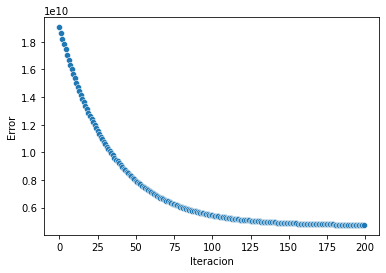

In [44]:
errorsGraph(datasetErrores)

### Evolución del modelo entrenado con el tiempo

In [162]:
datasetModel=pd.DataFrame(data=diccionario)
datasetModel=datasetModel.T
datasetModel.columns =['b0', 'b1']
datasetModel

,b0,b1
0,0.001812,2.114508
1,0.003599,4.197119
2,0.005361,6.248313
3,0.007100,8.268564
4,0.008815,10.258339
...,...,...
195,0.137360,133.045548
196,0.137619,133.153031
197,0.137877,133.258894
198,0.138133,133.363159


In [163]:
def modelEvolution(dataEstructure, n):
    for j in diccionario:
        if((j%n)==0):
            yPred=datasetTraining['1stFlrSF']*diccionario[j][1] + diccionario[j][0]
            sns.scatterplot(data=datasetTraining, x=datasetTraining['1stFlrSF'], y=datasetTraining['SalePrice'])
            plt.plot(datasetTraining['1stFlrSF'], yPred, color = 'green')
            plt.xlabel('X')
            plt.ylabel('y')
            plt.show()

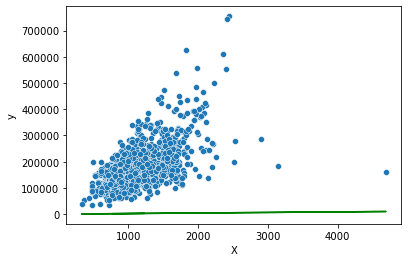

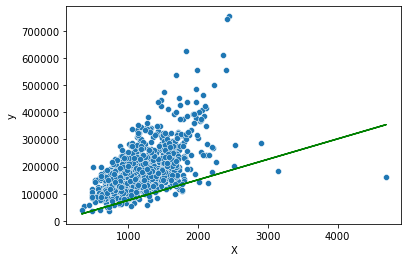

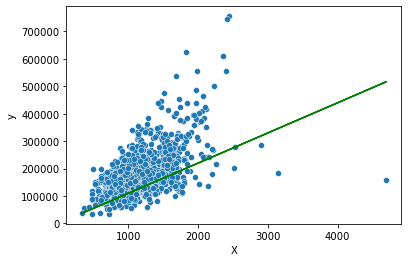

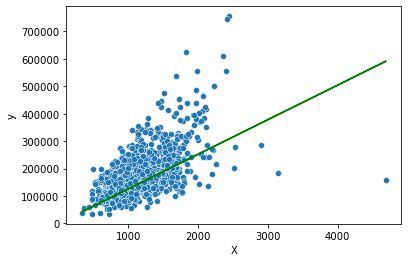

In [164]:
modelEvolution(diccionario,50)

### usar scikit-learn para entrenar un modelo de regresion lineal

#### Primera variable 1stFlrSF

In [165]:
regr = linear_model.LinearRegression()
regr.fit(datasetTraining[['1stFlrSF']], datasetTraining['SalePrice'])
regr.score(datasetTraining[['1stFlrSF']], datasetTraining['SalePrice'])

0.33975415906079387

In [166]:
regr.coef_

array([121.98790151])

In [167]:
regr.intercept_

38783.98233022369

In [168]:
regr.predict(datasetTesting[['1stFlrSF']])

array([178460.1295605 , 163455.61767463, 150036.9485084 , 161259.83544743,
       168091.15793205, 168091.15793205, 117954.13041097, 240795.9472327 ,
       155282.42827338, 135642.37613008, 133934.54550893, 309963.08738953,
       141253.8195996 , 122223.70696386, 156380.31938698, 140643.88009204,
       135032.43662253, 176020.37153028, 132958.64229684, 119295.99732759,
       167237.24262147, 163455.61767463, 248725.16083093, 186877.29476477,
       151988.75493258, 144181.52923586, 157112.24679605, 247383.2939143 ,
       165651.39990183, 133202.61809986, 226767.33855892, 266535.39445156,
       204931.50418842, 152964.65814467, 144181.52923586, 144303.51713738,
       126615.27141826, 186633.31896175, 213958.60890025, 330579.04274491,
       115636.36028225, 184437.53673455, 220545.95558185, 143693.57762982,
       162479.71446254, 267145.33395911, 206517.34690807, 237014.32228586,
       234452.57635412, 136618.27934217, 144181.52923586, 217862.2217486 ,
       143449.6018268 , 1

### Segunda variable OverallQual

In [169]:
regr = linear_model.LinearRegression()
regr.fit(datasetTraining[['OverallQual']], datasetTraining['SalePrice'])
regr.score(datasetTraining[['OverallQual']], datasetTraining['SalePrice'])

0.6153023145036048

In [170]:
regr.coef_

array([45522.20668336])

In [171]:
regr.intercept_

-97424.70836699574

In [172]:
regr.predict(datasetTesting[['OverallQual']])

array([266752.94509988, 221230.73841652, 130186.3250498 , 175708.53173316,
       130186.3250498 , 130186.3250498 ,  84664.11836644, 266752.94509988,
       130186.3250498 , 175708.53173316, 130186.3250498 , 221230.73841652,
        39141.91168308, 175708.53173316, 130186.3250498 , 130186.3250498 ,
       130186.3250498 , 130186.3250498 ,  84664.11836644, 175708.53173316,
       130186.3250498 , 175708.53173316, 130186.3250498 , 130186.3250498 ,
       175708.53173316,  84664.11836644, 175708.53173316, 266752.94509988,
       130186.3250498 , 266752.94509988, 221230.73841652, 130186.3250498 ,
       175708.53173316, 130186.3250498 , 130186.3250498 , 175708.53173316,
       130186.3250498 , 175708.53173316, 221230.73841652, 357797.3584666 ,
       130186.3250498 , 175708.53173316, 266752.94509988, 175708.53173316,
       221230.73841652, 221230.73841652, 175708.53173316, 266752.94509988,
       221230.73841652, 175708.53173316,  84664.11836644, 266752.94509988,
        84664.11836644, 1

### Para cada variable independiente x elegida, crear una funcion que usando el modelo entrenado manualmente y el modelo de scikit-learn

In [173]:
def modelManuallyAndSklearn(independentVariable, target):
    x=datasetTraining[independentVariable]
    y=datasetTraining[target]
    epochs=200
    imprimir_error_cada=1
    learning_rate=0.00000001
    
    ##modelo entrenado manualmente
    unos=np.ones(np.shape(x)).reshape(-1,1)
    x=x.to_numpy().reshape(-1,1)
    a=np.hstack([x,unos])
    b0=0
    b1=0
    errores=[]
    iteracionErrores=[]
    diccionario={}
    for i in range(epochs):
        betas=np.array([b1,b0]).reshape(-1,1)
        yEstimado=np.matmul(a,betas)
        gradienteB0=np.mean(yEstimado-y.to_numpy())
        gradienteB1=np.mean((yEstimado-y.to_numpy())*x)

        ##ACTUALIZACIÓN PARAMETROS DEL MODELO
        b0=b0-learning_rate*gradienteB0
        b1=b1-learning_rate*gradienteB1

        ##CALCULO DEL GRADIENTE DEL ERROR
        if((i%imprimir_error_cada)==0):
            errores.append(np.mean((yEstimado-y.to_numpy())**2)*1/2)
            iteracionErrores.append(i)
        ##ALMACENAR EN UNA ESTRUCTURA DE DATOS EL MODELO RESULTANTE
        diccionario[i]=[b0, b1]
        
    ##prediccion sklearn
    regr = linear_model.LinearRegression()
    regr.fit(datasetTraining[[independentVariable]], datasetTraining[target])
    regr.score(datasetTraining[[independentVariable]], datasetTraining[target])
    prediccionSkLearn=regr.predict(datasetTraining[[independentVariable]])
    
    ##prediccion manual
    prediccionManual=(datasetTraining[independentVariable]*b1 + b0)
    
    ##creación dataset resultado real y resultados generados manualmente y resultados generados con sklearn
    prediccionesFinales=pd.DataFrame({'Modelo Manual':prediccionManual, 'Modelo SKLearn':prediccionSkLearn, 'Resultado Real': datasetTraining[target] })
    prediccionesFinales['Promedio Resultado']=(prediccionesFinales['Modelo Manual']+prediccionesFinales['Modelo SKLearn'])/2
    print("Beta0: ", b0)
    print("Beta1: ", b1)
    return prediccionesFinales
    #print("prediccionSkLearn", prediccionSkLearn)
    #print("prediccionManual", prediccionManual)

In [174]:
prediccionesFinales1stFlrSF=modelManuallyAndSklearn('1stFlrSF', 'SalePrice')
prediccionesFinalesOverallQual=modelManuallyAndSklearn('OverallQual', 'SalePrice')

Beta0:  0.13838791972374406
Beta1:  133.46585214064507
Beta0:  0.362316058692295
Beta1:  2.2173204511449827


In [175]:
prediccionesFinales1stFlrSF

,Modelo Manual,Modelo SKLearn,Resultado Real,Promedio Resultado
268,103836.571353,133690.569706,120500.0,118763.570530
1372,147880.302560,173946.577205,274300.0,160913.439882
1174,156155.185392,181509.827098,239000.0,168832.506245
331,140940.078248,167603.206326,139000.0,154271.642287
949,184316.480194,207249.274317,197500.0,195782.877256
...,...,...,...,...
647,146011.780630,172238.746583,155000.0,159125.263607
58,190322.443540,212738.729885,438780.0,201530.586713
252,106505.888396,136130.327736,173000.0,121318.108066
235,64464.144972,97704.138760,89500.0,81084.141866


In [176]:
prediccionesFinalesOverallQual

,Modelo Manual,Modelo SKLearn,Resultado Real,Promedio Resultado
268,11.448918,130186.325050,120500.0,65098.886984
1372,15.883559,221230.738417,274300.0,110623.310988
1174,13.666239,175708.531733,239000.0,87861.098986
331,11.448918,130186.325050,139000.0,65098.886984
949,13.666239,175708.531733,197500.0,87861.098986
...,...,...,...,...
647,13.666239,175708.531733,155000.0,87861.098986
58,22.535521,357797.358467,438780.0,178909.946994
252,13.666239,175708.531733,173000.0,87861.098986
235,13.666239,175708.531733,89500.0,87861.098986


### Usando el 20 % de los datos de validaci´on, aplicamos los modelos predictivos para
### estimar la variable dependiente y usando los valores reales de y calculamos el error
### de cada modelo. Para cada variable independiente x elegida:

In [179]:
def resultTesting(independentVariable, target):
    x=datasetTraining[independentVariable]
    y=datasetTraining[target]
    epochs=200
    imprimir_error_cada=1
    learning_rate=0.00000001
    
    ##modelo entrenado manualmente
    unos=np.ones(np.shape(x)).reshape(-1,1)
    x=x.to_numpy().reshape(-1,1)
    a=np.hstack([x,unos])
    b0=0
    b1=0
    errores=[]
    iteracionErrores=[]
    diccionario={}
    for i in range(epochs):
        betas=np.array([b1,b0]).reshape(-1,1)
        yEstimado=np.matmul(a,betas)
        gradienteB0=np.mean(yEstimado-y.to_numpy())
        gradienteB1=np.mean((yEstimado-y.to_numpy())*x)

        ##ACTUALIZACIÓN PARAMETROS DEL MODELO
        b0=b0-learning_rate*gradienteB0
        b1=b1-learning_rate*gradienteB1

        ##CALCULO DEL GRADIENTE DEL ERROR
        if((i%imprimir_error_cada)==0):
            errores.append(np.mean((yEstimado-y.to_numpy())**2)*1/2)
            iteracionErrores.append(i)
        ##ALMACENAR EN UNA ESTRUCTURA DE DATOS EL MODELO RESULTANTE
        diccionario[i]=[b0, b1]
    
    ##prediccion manual
    prediccionManual=(datasetTesting[independentVariable]*b1 + b0)
    
    ##creación dataset resultado real y resultados generados manualmente y resultados generados con sklearn
    prediccionesFinalesTesting=pd.DataFrame({'Modelo Manual':prediccionManual, 'Resultado Real': datasetTesting[target] })
    prediccionesFinalesTesting['Error']=np.mean((prediccionesFinalesTesting['Modelo Manual']-prediccionesFinalesTesting['Resultado Real'])**2)*1/2
    prediccionesFinalesTesting['Error2']=(prediccionesFinalesTesting['Modelo Manual']-prediccionesFinalesTesting['Resultado Real'])
    print("Beta0: ", b0)
    print("Beta1: ", b1)
    return prediccionesFinalesTesting

In [180]:
prediccionesFinalesTesting1stFlrSF=resultTesting('1stFlrSF', 'SalePrice')
prediccionesFinalesTestingOverallQual=resultTesting('OverallQual', 'SalePrice')

Beta0:  0.13838791972374406
Beta1:  133.46585214064507
Beta0:  0.362316058692295
Beta1:  2.2173204511449827


In [181]:
prediccionesFinalesTesting1stFlrSF

,Modelo Manual,Resultado Real,Error,Error2
4,152818.539089,250000.0,1.882230e+09,-97181.460911
8,136402.239276,129900.0,1.882230e+09,6502.239276
12,121720.995540,144000.0,1.882230e+09,-22279.004460
16,133999.853937,149000.0,1.882230e+09,-15000.146063
23,141473.941657,129900.0,1.882230e+09,11573.941657
...,...,...,...,...
1426,163228.875556,271000.0,1.882230e+09,-107771.124444
1442,136936.102684,310000.0,1.882230e+09,-173063.897316
1446,158557.570731,157900.0,1.882230e+09,657.570731
1456,276674.849875,210000.0,1.882230e+09,66674.849875


In [182]:
prediccionesFinalesTestingOverallQual

,Modelo Manual,Resultado Real,Error,Error2
4,18.100880,250000.0,1.914439e+10,-249981.899120
8,15.883559,129900.0,1.914439e+10,-129884.116441
12,11.448918,144000.0,1.914439e+10,-143988.551082
16,13.666239,149000.0,1.914439e+10,-148986.333761
23,11.448918,129900.0,1.914439e+10,-129888.551082
...,...,...,...,...
1426,15.883559,271000.0,1.914439e+10,-270984.116441
1442,22.535521,310000.0,1.914439e+10,-309977.464479
1446,11.448918,157900.0,1.914439e+10,-157888.551082
1456,13.666239,210000.0,1.914439e+10,-209986.333761


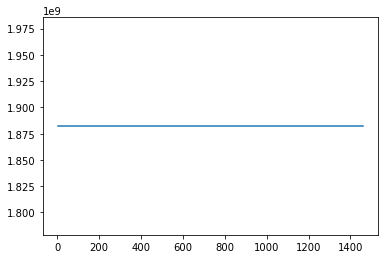

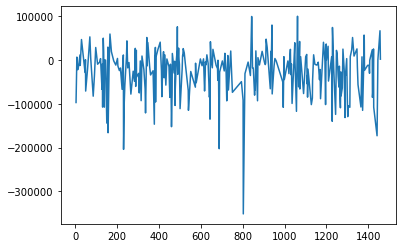

In [184]:
plt.plot(prediccionesFinalesTesting1stFlrSF['Error'])
plt.show()
plt.plot(prediccionesFinalesTesting1stFlrSF['Error2'])
plt.show()


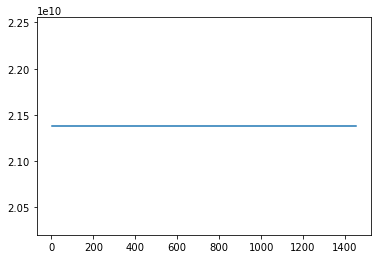

In [139]:
plt.plot(prediccionesFinalesTestingOverallQual['Error'])